In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import seaborn as sns
import cv2
import os

In [44]:
df_train = pd.read_csv('datasets/training/labels.csv')
df_test = pd.read_csv('datasets/test/labels.csv')
df_eval = pd.read_csv('datasets/evaluation/labels.csv')

df_train['type'] = 'train'
df_test['type'] = 'test'
df_eval['type'] = 'eval'

In [45]:
df.head(10)

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


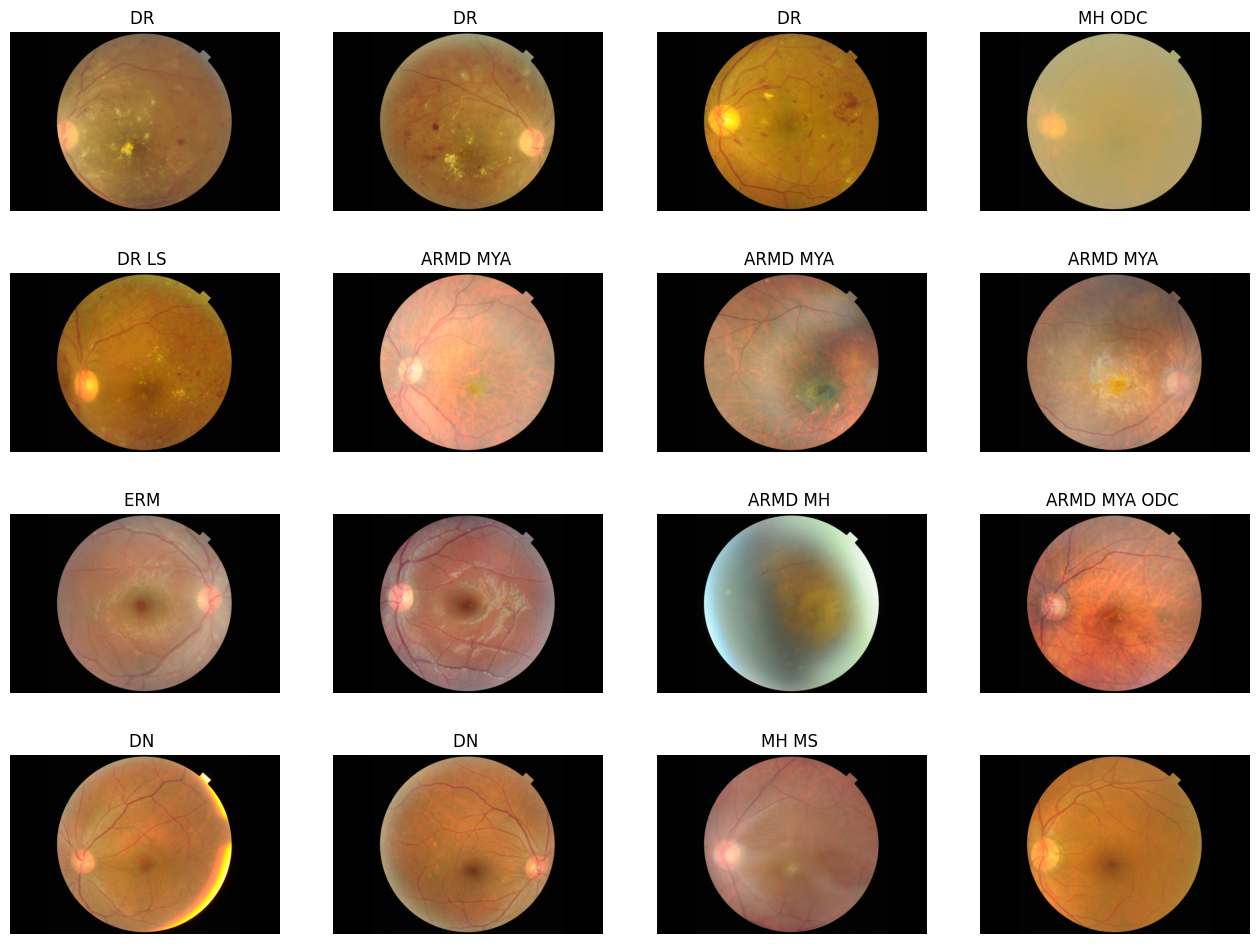

In [46]:
# Show some eye images with their pathologies
def show_images(ids):
    plt.figure(figsize=(16, 12))
    
    for plot_index, id_ in enumerate(ids):
        plt.subplot(4, 4, plot_index + 1)
        image = mpimg.imread(os.path.join('datasets/training/images', '{}.png'.format(id_)))
        plt.imshow(image)
        title = ""
        for desease in df.columns[2:]:
            if df[df['ID'] == id_][desease].values[0] == 1:
                title += desease + " "
        plt.title(title)
        plt.axis('off')
        
    plt.show()

# Show the eyes with id 1 to 16
show_images(df['ID'][:16])

Text(0, 0.5, 'Number of images')

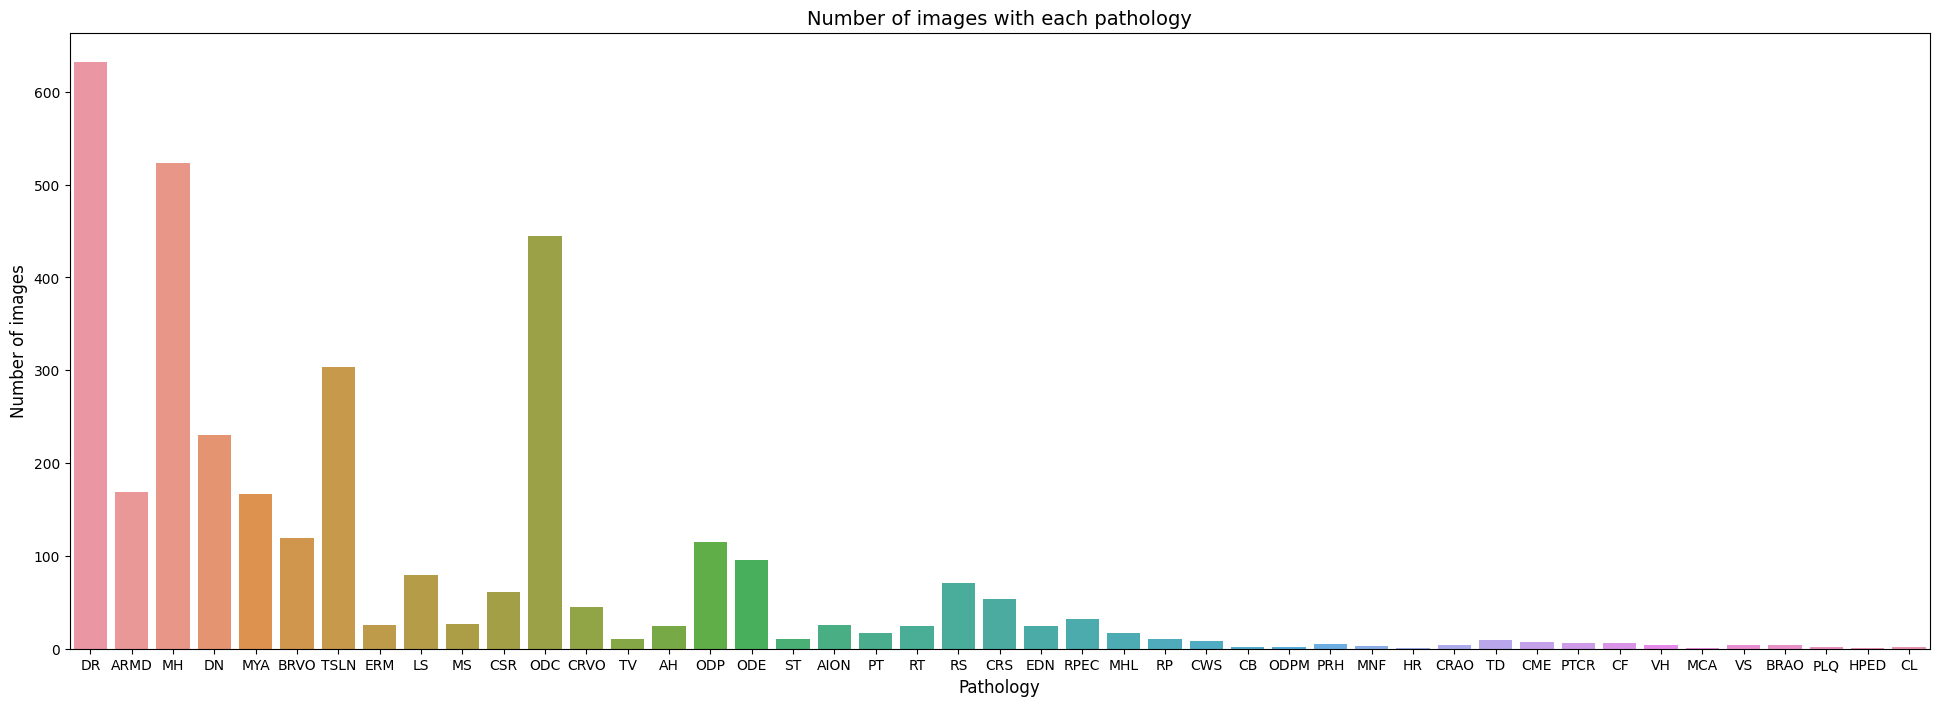

In [51]:
# Histogram of the number of images with each pathology for all the dataset (train, test and validation)
plt.figure(figsize=(24, 8))
sns.barplot(y=pd.concat([df_train, df_test, df_eval]).drop(['ID', 'Disease_Risk'], axis=1).sum().values,
    x=pd.concat([df_train, df_test, df_eval]).drop(['ID', 'Disease_Risk'], axis=1).columns)
plt.title("Number of images with each pathology", fontsize=14)
plt.xlabel("Pathology", fontsize=12)
plt.ylabel("Number of images", fontsize=12)

